<a href="https://colab.research.google.com/github/fengivan/382L-HW5/blob/master/HW5Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import numpy as np
import sys
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(threshold=sys.maxsize)

In [300]:
def exact(x, y, t):                   #gives the exact solution to the function U(x,y,t)
  return math.exp(-t)*(x**2+y**2)+1  
  

In [299]:
def getInitial(size):                 #set initial conditions for U(x,y,0)
  deltax=1/(size-1)
  deltay=1/(size-1)
  U=np.zeros((size,size))
  U = U.astype(float)
  for i in range(0,size):
    for j in range(0,size):
      U[i,j]=exact(i*deltax, j*deltay, 0)     #U[x,y], U[row,column]


  U=U.reshape(size*size,1)                    #reshape it to a vector U00,U01,U02,U03..U10,U11,U12.... Uxy
  return U




In [302]:
def getA(r, g, size):
  A=np.identity(size)
  A=np.concatenate((A,np.tile(np.zeros((size,size)), size-1)), axis=1)
  
  D=np.identity(size)
  E=np.zeros((size, size))
  zeros=0
  
  for i in range(1, size-1):
    D[i, zeros]=r
    D[i, zeros+1]=g
    D[i, zeros+2]=r
    E[i, zeros+1]=r
    zeros+=1
  
  zeros=0
  for i in range(0, size-2):
    temp=np.concatenate((np.tile(np.zeros((size, size)),i),E,D,E,np.tile(np.zeros((size, size)),size-3-i)), axis=1)
    A=np.concatenate((A,temp),axis=0)
  
  temp=np.concatenate((np.tile(np.zeros((size, size)),size-1), np.identity(size)), axis=1)

  A=np.concatenate((A,temp), axis=0)
  return A



In [303]:
def getC(n, size, deltat):
  deltax=1/(size-1)
  deltay=1/(size-1)
  
  C=np.zeros((size,size))
 
  
  for i in range(0, size):
    for j in range(0, size):
      if  not (i ==0 or j==0 or i == size-1 or j == size -1):
        C[i,j]=-math.exp(-n*deltat)*(4+(i*deltax)**2+(j*deltay)**2)
      else:
        C[i,j]=0

  return C.reshape(size*size,1)


[[1.       1.0025   1.01     1.0225   1.04     1.0625   1.09     1.1225   1.16     1.2025   1.25     1.3025   1.36     1.4225   1.49     1.5625   1.64     1.7225   1.81     1.9025   2.      ]
 [1.0025   1.007083 1.015804 1.029023 1.046913 1.06957  1.097052 1.129403 1.166652 1.208824 1.255938 1.308012 1.365062 1.427103 1.494148 1.566213 1.643313 1.725465 1.812689 1.905017 2.0025  ]
 [1.01     1.015804 1.025426 1.039238 1.057474 1.080285 1.107775 1.14002  1.177076 1.218991 1.265801 1.317542 1.374244 1.435935 1.502645 1.574401 1.651232 1.733169 1.820245 1.912504 2.01    ]
 [1.0225   1.029023 1.039238 1.053473 1.071968 1.0949   1.122397 1.15456  1.191466 1.233179 1.279754 1.331238 1.387677 1.449113 1.515585 1.587135 1.663803 1.74563  1.832659 1.924934 2.0225  ]
 [1.04     1.046913 1.057474 1.071968 1.090626 1.113629 1.141119 1.17321  1.209993 1.251547 1.29794  1.349232 1.405479 1.466735 1.533052 1.604481 1.68107  1.762871 1.84993  1.942294 2.04    ]
 [1.0625   1.06957  1.080285 1.0949   1.

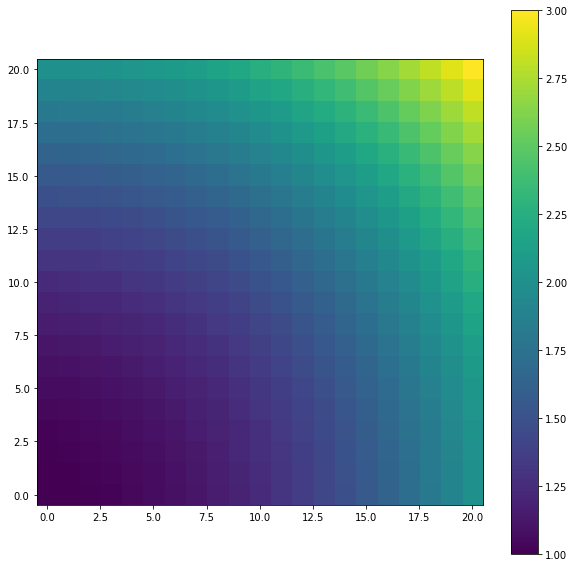

In [309]:
size=21
deltax=1/(size-1)
deltat=.01
deltay=1/(size-1)


r=-1/(2*deltax**2)
g=2/(deltax**2)+1/deltat
h=1/deltat-2/(deltax**2)

U=getInitial(size)
A=getA(r,g, size)
B=getA(-r,h,size)

for n in range(0, round(.2/deltat)):
  time=n*deltat
  C=getC(n, size, deltat)
  lhs=np.matmul(B, U)+C
  U=np.linalg.solve(A, lhs)


U=U.reshape(size,size)

print(np.around(U, 6))
print("U at time "+str(round(.2/deltat)))
plt.imshow(U)
plt.colorbar()
#plt.clim(1, 3)
plt.gca().invert_yaxis()
plt.show()


[[1.     1.0025 1.01   1.0225 1.04   1.0625 1.09   1.1225 1.16   1.2025 1.25   1.3025 1.36   1.4225 1.49   1.5625 1.64   1.7225 1.81   1.9025 2.    ]
 [1.0025 1.005  1.0125 1.025  1.0425 1.065  1.0925 1.125  1.1625 1.205  1.2525 1.305  1.3625 1.425  1.4925 1.565  1.6425 1.725  1.8125 1.905  2.0025]
 [1.01   1.0125 1.02   1.0325 1.05   1.0725 1.1    1.1325 1.17   1.2125 1.26   1.3125 1.37   1.4325 1.5    1.5725 1.65   1.7325 1.82   1.9125 2.01  ]
 [1.0225 1.025  1.0325 1.045  1.0625 1.085  1.1125 1.145  1.1825 1.225  1.2725 1.325  1.3825 1.445  1.5125 1.585  1.6625 1.745  1.8325 1.925  2.0225]
 [1.04   1.0425 1.05   1.0625 1.08   1.1025 1.13   1.1625 1.2    1.2425 1.29   1.3425 1.4    1.4625 1.53   1.6025 1.68   1.7625 1.85   1.9425 2.04  ]
 [1.0625 1.065  1.0725 1.085  1.1025 1.125  1.1525 1.185  1.2225 1.265  1.3125 1.365  1.4225 1.485  1.5525 1.625  1.7025 1.785  1.8725 1.965  2.0625]
 [1.09   1.0925 1.1    1.1125 1.13   1.1525 1.18   1.2125 1.25   1.2925 1.34   1.3925 1.45   1.5125 

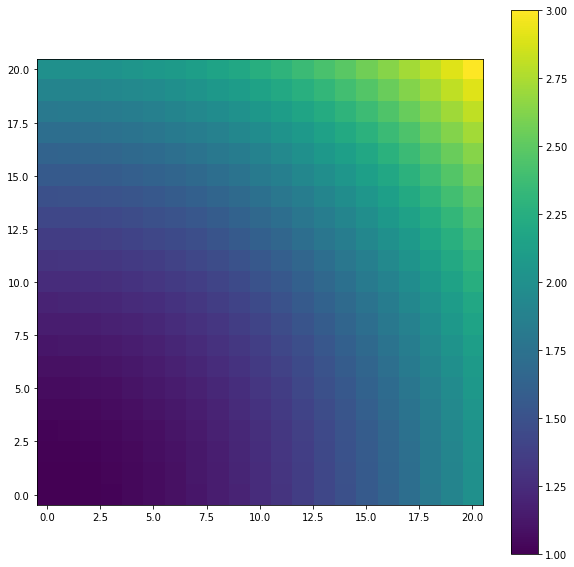

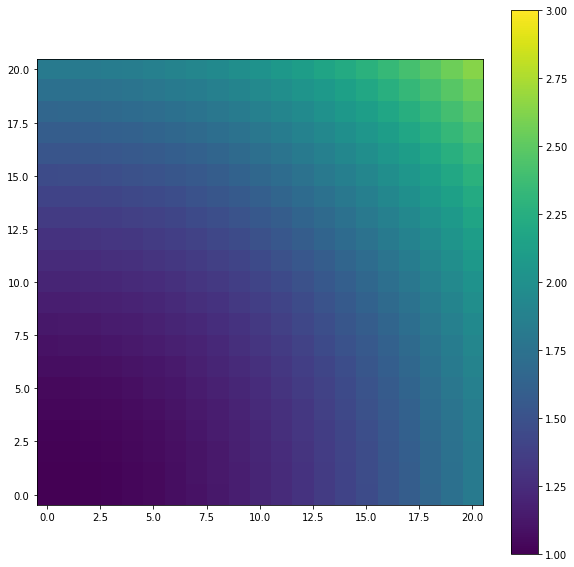

In [306]:
solu=np.zeros((size,size))
for i in range(0,size):
  for j in range(0,size):
    solu[i,j]=exact(i*deltax, j*deltay, 0)
  
 
soluf=np.zeros((size,size))
for i in range(0,size):
  for j in range(0,size):
    soluf[i,j]=exact(i*deltax, j*deltay, .2)


print(solu)

plt.imshow(solu)
plt.colorbar()
plt.gca().invert_yaxis()
plt.clim(1, 3)
plt.show()
plt.imshow(soluf)
plt.colorbar()
plt.clim(1, 3)
plt.gca().invert_yaxis()
plt.show()